In [214]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
%matplotlib inline


from sklearn.cluster import DBSCAN
from collections import Counter

import sys
sys.path.append('../analysis/')
from csv_to_pandas import csv_into_dict_of_data

from plot_graph import remove_zero_columns

training_dataset = "../../csv/training_dataset"
testing_dataset = "../../csv/testing_dataset"
df_key = 'snmp'
epsilon = 10000
miniminum_points = 3

In [215]:
df_dict = csv_into_dict_of_data(training_dataset)
df_dict = remove_zero_columns(df_dict)

In [218]:
df = df_dict[df_key]

df = df.reindex(sorted(df.columns), axis = 1)
print(df.head())
df = df.T 
df.head()

Time,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,02:15:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
2018-09-08,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-09-11,22.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-09-13,22.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-09-14,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2018-09-15,22.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [217]:
model = DBSCAN(eps = epsilon, min_samples = miniminum_points).fit(df)
print(Counter(model.labels_))
color_scheme = list(model.labels_)
print(color_scheme)
model.labels_

Counter({1: 98, -1: 25, 2: 12, 0: 7})
[0, 0, 0, 0, 0, 0, 0, -1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, -1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1]


array([ 0,  0,  0,  0,  0,  0,  0, -1,  1,  1,  1,  1,  2,  1,  1,  1,  1,
        1,  1,  2,  1,  1,  1,  1,  1,  1,  2,  1,  1, -1,  1,  1,  1,  2,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,
        2,  1,  1,  1,  1,  1,  1,  2,  1,  1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  2,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
       -1, -1, -1, -1, -1,  1])

In [210]:
df_outlier = pd.DataFrame(df) 
outlier = df_outlier[model.labels_ == -1].T
outlier.head()

,2018-09-19,2018-10-11,2018-11-29,2018-11-30,2018-12-01,2018-12-03,2018-12-04,2018-12-05,2018-12-06,2018-12-07,...,2019-01-09,2019-01-12,2019-01-14,2019-01-19,2019-01-21,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30
Time,,,,,,,,,,,,,,,,,,,,,
00:00:00,0.0,6222.0,5827.0,41414.0,57310.0,2565.0,46385.0,5791.0,8159.0,58728.0,...,51579.0,2536.0,4889.0,1569.0,790.0,228.0,47763.0,3242.0,5741.0,5665.0
00:15:00,0.0,94.0,218.0,67.0,58405.0,3354.0,45171.0,88.0,113.0,49106.0,...,47358.0,1319.0,462.0,1731.0,2520.0,2992.0,48402.0,185.0,147.0,144.0
00:30:00,0.0,3700.0,3333.0,3537.0,52844.0,82.0,41969.0,3330.0,3305.0,57547.0,...,51524.0,2166.0,2902.0,1739.0,703.0,513.0,47610.0,3269.0,3336.0,3334.0
00:45:00,0.0,87.0,36.0,55.0,53750.0,3316.0,46014.0,146.0,64.0,52772.0,...,50487.0,1195.0,616.0,2194.0,2305.0,2978.0,52982.0,27.0,93.0,44.0
01:00:00,0.0,3702.0,3339.0,3392.0,57836.0,55.0,41559.0,3315.0,3383.0,54902.0,...,54587.0,2142.0,2557.0,1136.0,775.0,419.0,48799.0,3201.0,3275.0,3279.0


In [211]:
df_normal = pd.DataFrame(df)
normal = df_normal[model.labels_ != -1].T
normal.head()

,2018-09-08,2018-09-11,2018-09-13,2018-09-14,2018-09-15,2018-09-16,2018-09-17,2018-09-20,2018-09-21,2018-09-22,...,2019-01-15,2019-01-16,2019-01-17,2019-01-18,2019-01-20,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-31
Time,,,,,,,,,,,,,,,,,,,,,
00:00:00,11.0,22.0,22.0,23.0,22.0,22.0,11.0,2585.0,2538.0,2566.0,...,1686.0,1574.0,1537.0,1301.0,1105.0,677.0,338.0,167.0,376.0,3279.0
00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,107.0,62.0,...,1524.0,1995.0,2092.0,857.0,2491.0,2485.0,3045.0,3214.0,3138.0,228.0
00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3756.0,3635.0,3618.0,...,1874.0,1472.0,1392.0,2762.0,851.0,732.0,327.0,278.0,359.0,3374.0
00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,54.0,94.0,...,1712.0,1871.0,2309.0,1188.0,2170.0,2508.0,3041.0,3287.0,2715.0,57.0
01:00:00,0.0,2.0,2.0,0.0,0.0,0.0,2.0,3755.0,3731.0,3626.0,...,1573.0,1502.0,1077.0,2203.0,1041.0,566.0,225.0,180.0,610.0,3331.0


Text(0.5, 1.0, 'DNS Traffic outlier')

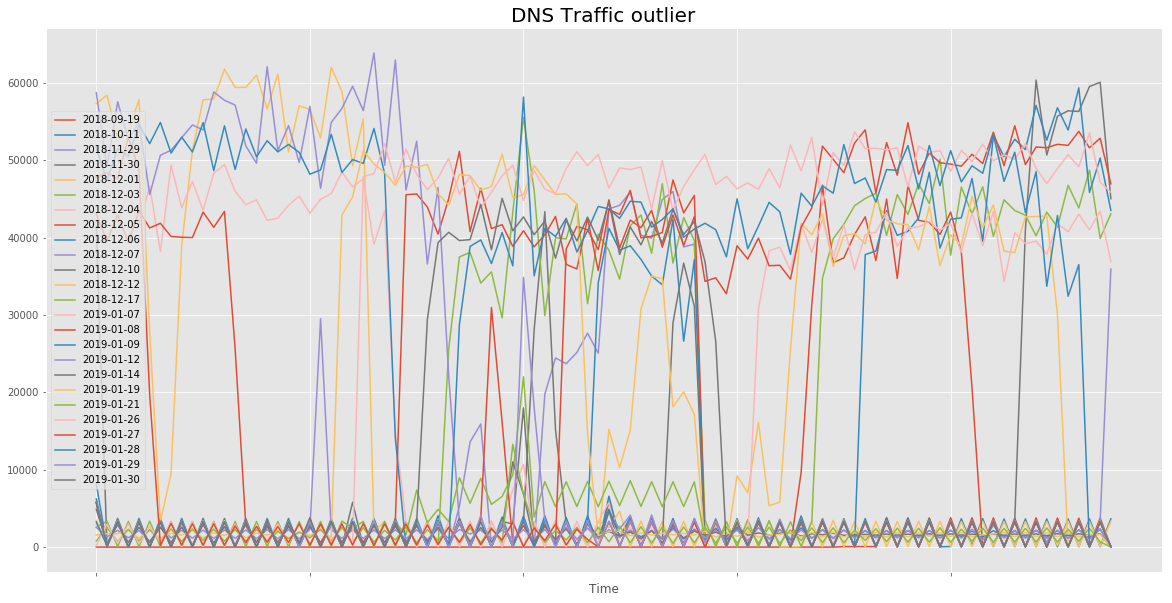

In [212]:
outlier.plot( figsize = (20, 10) )
plt.title('DNS Traffic outlier', fontsize=20)

Text(0.5, 1.0, 'DNS Traffic within epsilon 10000 and min points 3')

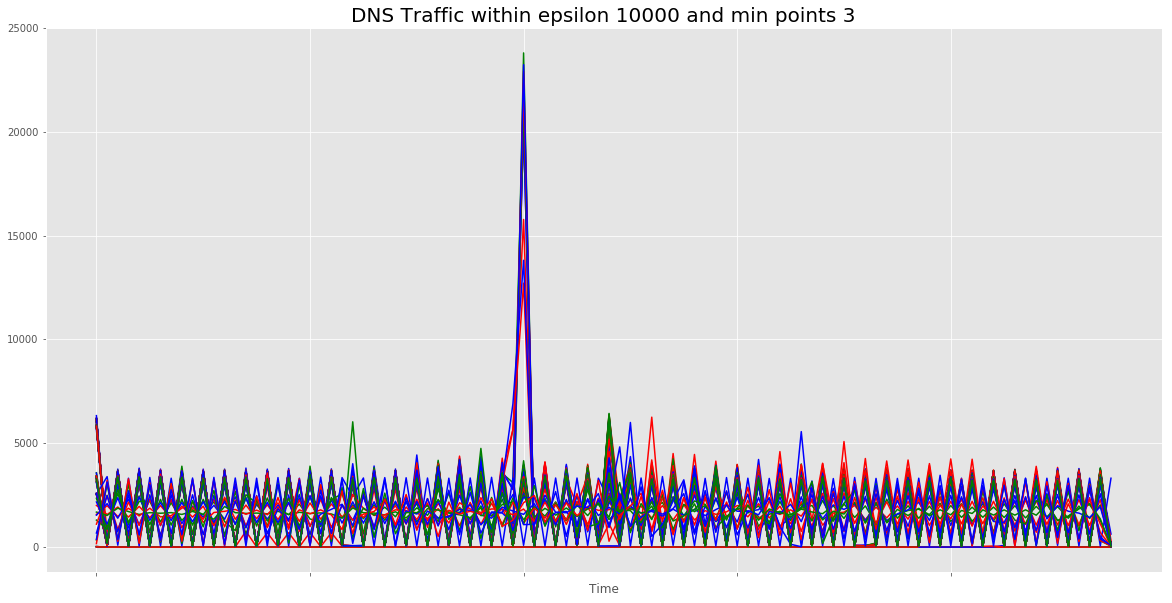

In [213]:
normal.plot(legend = False, figsize = (20, 10), color = ['r', 'b', 'g'])
title = 'DNS Traffic within epsilon ' + str(epsilon) + ' and min points ' + str(miniminum_points)
plt.title(title, fontsize=20)